# Heatwave Analysis by Cell

Graphing:
* Change in number
* Change in magnitude

For tasmax and tasmin

4 graphs per cell. 

Graphing or raw data is going to be 300 pages long. 

For each cell, load up tasmax, tasmin and a graph of 4 subgrapsh (change in num and change in max for both of them)

1. NUmber of heatwave days per year - absolute number and percentage (on same graph as they are linked)
2. Highest value per year for each graph

1. Length
2. Percentage of days
3. Highest value 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Automatically parse dates when reading in all csv files
# Less lines of code and gives us access to the full power of datetime indexes
tasmax_heat = pd.read_csv('tasmax_heatwaves.csv', parse_dates=['date'])
tasmax_heat = tasmax_heat.set_index(['lon', 'lat', 'date'])

tasmin_heat = pd.read_csv('tasmin_heatwaves.csv', parse_dates=['date'])
tasmin_heat = tasmin_heat.set_index(['lon', 'lat', 'date'])

tasmax = pd.read_csv('tasmax.csv', parse_dates=['date'])
tasmax = tasmax.set_index(['lon', 'lat', 'date'])

tasmin = pd.read_csv('tasmin.csv', parse_dates=['date'])
tasmin = tasmin.set_index(['lon', 'lat', 'date'])

# Need this to get all the cells
tasmax_other = pd.read_csv('tasmax_heatwaves.csv', parse_dates=['date'])
tasmax_other = tasmax_other.set_index(['lon', 'lat'])

In [3]:
# Store cells in variable
cells = list(np.unique(tasmax_other.index))

In [4]:
# Creates analysis.csv - is quite slow
def create_analysis_csv():
    for i, cell in enumerate(cells):
        df_cell = pd.DataFrame()
        for year in range(2006, 2099):
            # Note: both the start and end date are included in the slice (this was the bug from before)
            # If we do .loc['2006': '2007'] it selects data from 2006 and 2007
            # So, we select a range from the start of this year to the end of it 
            # i.e. .loc['2006': '2006'] selects all data from 2006
            # This returns an empty dataframe if there is no data for that year
            # if we do not slice (.loc['2006']), we may get a KeyError if there are, for example, no heatwaves 
            # recorded in 2006
            data_tasmin_heat = tasmin_heat.loc[cell].loc[f'{year}': f'{year}'] 
            data_tasmax_heat = tasmax_heat.loc[cell].loc[f'{year}': f'{year}']
            
            data_tasmin = tasmin.loc[cell].loc[f'{year}': f'{year}']  
            data_tasmax = tasmax.loc[cell].loc[f'{year}': f'{year}'] 
            
            lon, lat = cell[0], cell[1]

            tasmin_num_days, tasmax_num_days = len(data_tasmin_heat), len(data_tasmax_heat)
            tasmin_pct_days, tasmax_pct_days = len(data_tasmin_heat)/365.25, len(data_tasmax_heat)/365.25
            
            tasmin_max_temp = float(data_tasmin.max())
            tasmax_max_temp = float(data_tasmax.max())

            data_dict = {'lon': lon,
                        'lat': lat,
                        'year': np.datetime64(str(year)),
                        'tasmax_num_days': tasmax_num_days,
                        'tasmax_pct_days': tasmax_pct_days,
                        'tasmax_max_temp': tasmax_max_temp,
                        'tasmin_num_days': tasmin_num_days,
                        'tasmin_pct_days': tasmin_pct_days,
                        'tasmin_max_temp': tasmin_max_temp}

            df = pd.DataFrame(data_dict, index=[0])
            df = df.set_index(['lon', 'lat'])
            
            if i == 0 and year == 2006:
                df.to_csv('analysis.csv')
            else:
                df.to_csv('analysis.csv', mode='a', header=False)
        print(f'Index {i}/{len(cells)-1} - it worked for {cell}')     

In [5]:
create_analysis_csv()

/Users/king/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()
/Users/king/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.


Index 0/363 - it worked for (-122.75, 42.25)
Index 1/363 - it worked for (-119.75, 34.25)
Index 2/363 - it worked for (-118.25, 34.75)
Index 3/363 - it worked for (-109.75, 31.25)
Index 4/363 - it worked for (-106.75, 32.25)
Index 5/363 - it worked for (-106.25, 28.75)
Index 6/363 - it worked for (-103.25, 25.75)
Index 7/363 - it worked for (-102.75, 20.75)
Index 8/363 - it worked for (-99.75, 16.75)
Index 9/363 - it worked for (-99.75, 17.75)
Index 10/363 - it worked for (-98.75, 20.25)
Index 11/363 - it worked for (-98.25, 34.75)
Index 12/363 - it worked for (-97.75, 25.75)
Index 13/363 - it worked for (-97.25, 19.75)
Index 14/363 - it worked for (-96.25, 42.25)
Index 15/363 - it worked for (-91.25, 14.25)
Index 16/363 - it worked for (-90.75, 42.75)
Index 17/363 - it worked for (-88.25, 15.25)
Index 18/363 - it worked for (-87.75, 42.25)
Index 19/363 - it worked for (-85.75, 42.75)
Index 20/363 - it worked for (-84.75, 42.75)
Index 21/363 - it worked for (-84.25, 33.75)
Index 22/363

Index 184/363 - it worked for (39.75, 43.75)
Index 185/363 - it worked for (39.75, 57.75)
Index 186/363 - it worked for (40.25, 0.25)
Index 187/363 - it worked for (40.75, 37.25)
Index 188/363 - it worked for (42.25, 57.25)
Index 189/363 - it worked for (42.75, -0.25)
Index 190/363 - it worked for (43.25, -11.75)
Index 191/363 - it worked for (43.25, 35.75)
Index 192/363 - it worked for (43.25, 39.25)
Index 193/363 - it worked for (43.75, 26.25)
Index 194/363 - it worked for (43.75, 43.75)
Index 195/363 - it worked for (44.25, 46.25)
Index 196/363 - it worked for (44.75, 32.75)
Index 197/363 - it worked for (45.75, 37.25)
Index 198/363 - it worked for (46.75, 30.75)
Index 199/363 - it worked for (47.25, -19.75)
Index 200/363 - it worked for (47.25, 17.25)
Index 201/363 - it worked for (47.75, 29.25)
Index 202/363 - it worked for (47.75, 30.25)
Index 203/363 - it worked for (48.25, 29.25)
Index 204/363 - it worked for (48.75, 37.75)
Index 205/363 - it worked for (48.75, 38.25)
Index 206

In [6]:
analysis = pd.read_csv('analysis.csv')
analysis = analysis.set_index(['lon', 'lat', 'year'])
analysis

tasmax_num_days  tasmax_pct_days  tasmax_max_temp  \
lon     lat    year                                                            
-122.75  42.25 2006-01-01               27         0.073922       310.828217   
               2007-01-01               17         0.046543       310.177887   
               2008-01-01               20         0.054757       307.915619   
               2009-01-01               30         0.082136       316.693970   
               2010-01-01               35         0.095825       312.144409   
...                                    ...              ...              ...   
 144.75 -6.25  2094-01-01               15         0.041068       316.924896   
               2095-01-01               16         0.043806       316.329315   
               2096-01-01               16         0.043806       318.168640   
               2097-01-01               41         0.112252       315.393127   
               2098-01-01               38         0.104038       322.137512   

                           tasmin_num_days  tasmin_pct_days  tasmin_max_temp  
lon     lat    year                                                           
-122.75  42.25 2006-01-01               24         0.065708       294.072998  
               2007-01-01               16         0.043806       289.881714  
               2008-01-01               17         0.046543       288.854095  
               2009-01-01               25         0.068446       295.634766  
               2010-01-01               39         0.106776       292.761444  
...                                    ...              ...              ...  
 144.75 -6.25  2094-01-01              607         1.661875       296.912415  
               2095-01-01              558         1.527721       296.972382  
               2096-01-01              553         1.514031       296.531097  
               2097-01-01              555         1.519507       295.959137  
               2098-01-01              600         1.642710       297.205872  

[33852 rows x 6 columns]

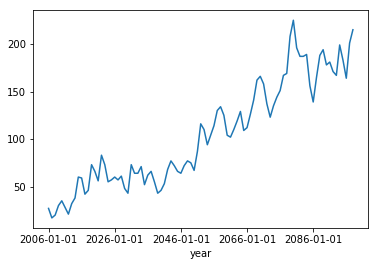

In [7]:
analysis.loc[-122.75, 42.25].tasmax_num_days.plot()

In [8]:
# Creates all the plots in your current working directory
def create_actual_data_plots():
    for i, cell in enumerate(cells):
        fig, axes = plt.subplots(2, 2, figsize=(8, 11), sharex=True)

        data = analysis.loc[cell]
        rolling = data.rolling(window=5, win_type='exponential')
        rolling_mean = rolling.mean(tau=20)

        axes[0, 0].plot(data.tasmax_num_days, 'r', label='Actual')
        axes[0, 0].plot(rolling_mean.tasmax_num_days, 'k', label='Rolling mean')
        axes[0, 0].set(title='Tasmax Num Days')
        axes[0, 0].legend()


        axes[0, 1].plot(data.tasmin_num_days, 'b', label='Actual')
        axes[0, 1].plot(rolling_mean.tasmin_num_days, 'k', label='Rolling mean')
        axes[0, 1].set(title='Tasmin Num Days')
        axes[0, 1].legend()

        axes[1, 0].plot(data.tasmax_max_temp, 'r')
        axes[1, 0].plot(rolling_mean.tasmax_max_temp, 'k')
        axes[1, 0].set(title='Tasmax Max Temperature', xlabel='Date (2006-2099)')

        axes[1, 1].plot(data.tasmin_max_temp, 'b')
        axes[1, 1].plot(rolling_mean.tasmin_max_temp, 'k')
        axes[1, 1].set(title='Tasmin Max Temperature', xlabel='Date (2006-2099)')

        axes[1, 0].set_xticks([])
        axes[1, 1].set_xticks([])

        plt.tight_layout()

        fig.suptitle(f'{cell}')
        plt.savefig(f'plots\{cell}.pdf')
        plt.close()
        print(f'Index {i} worked for {cell}')      
        

In [10]:
create_actual_data_plots()

Index 0 worked for (-122.75, 42.25)
Index 1 worked for (-119.75, 34.25)
Index 2 worked for (-118.25, 34.75)
Index 3 worked for (-109.75, 31.25)
Index 4 worked for (-106.75, 32.25)
Index 5 worked for (-106.25, 28.75)
Index 6 worked for (-103.25, 25.75)
Index 7 worked for (-102.75, 20.75)
Index 8 worked for (-99.75, 16.75)
Index 9 worked for (-99.75, 17.75)
Index 10 worked for (-98.75, 20.25)
Index 11 worked for (-98.25, 34.75)
Index 12 worked for (-97.75, 25.75)
Index 13 worked for (-97.25, 19.75)
Index 14 worked for (-96.25, 42.25)
Index 15 worked for (-91.25, 14.25)
Index 16 worked for (-90.75, 42.75)
Index 17 worked for (-88.25, 15.25)
Index 18 worked for (-87.75, 42.25)
Index 19 worked for (-85.75, 42.75)
Index 20 worked for (-84.75, 42.75)
Index 21 worked for (-84.25, 33.75)
Index 22 worked for (-79.75, -1.25)
Index 23 worked for (-79.25, 44.25)
Index 24 worked for (-77.75, 21.25)
Index 25 worked for (-76.25, 4.25)
Index 26 worked for (-75.25, 7.75)
Index 27 worked for (-73.75, 18.

Index 231 worked for (74.25, 17.25)
Index 232 worked for (74.25, 20.75)
Index 233 worked for (74.75, 18.75)
Index 234 worked for (74.75, 26.75)
Index 235 worked for (75.25, 13.75)
Index 236 worked for (75.25, 19.25)
Index 237 worked for (75.25, 21.75)
Index 238 worked for (75.75, 17.75)
Index 239 worked for (76.25, 12.75)
Index 240 worked for (76.75, 25.75)
Index 241 worked for (76.75, 30.75)
Index 242 worked for (76.75, 43.25)
Index 243 worked for (76.75, 66.25)
Index 244 worked for (77.75, 19.75)
Index 245 worked for (78.25, 10.75)
Index 246 worked for (78.25, 12.75)
Index 247 worked for (78.25, 15.25)
Index 248 worked for (78.25, 24.25)
Index 249 worked for (78.75, 11.75)
Index 250 worked for (79.25, 9.75)
Index 251 worked for (79.25, 19.25)
Index 252 worked for (79.75, 28.75)
Index 253 worked for (80.25, 15.75)
Index 254 worked for (80.25, 21.75)
Index 255 worked for (80.75, 16.75)
Index 256 worked for (81.75, 7.75)
Index 257 worked for (81.75, 27.25)
Index 258 worked for (82.25, 1